

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [66]:
yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'
yesterday = str(yesterday)[1:-1]
print(type(yesterday))
print(yesterday)

# date -d "2 weeks ago"

<class 'str'>
'2016-12-09'


### get url

In [67]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'
#startdate = "'2016-12-09'"
startdate = yesterday
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-09'


In [68]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [69]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [70]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [71]:
df = pd.read_csv(url)

In [72]:
df.shape

(108, 16)

#### wow, 5 days > 1000 reports

In [73]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6613343,12/09/2016 08:05:46 PM,NaN,12/09/2016 08:05:46 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 4TH AVE and BALBOA ST,1,Inner Richmond,"(37.7773318868498, -122.461868072166)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg
1,6613328,12/09/2016 07:56:57 PM,12/09/2016 08:43:35 PM,12/09/2016 08:43:35 PM,Closed,Case is a Duplicate -,311 Supervisor Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"945 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Excelsior,"(37.716261032502, -122.440268419619)",Voice In,NaN
2,6613323,12/09/2016 07:52:11 PM,NaN,12/09/2016 07:53:54 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"952 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Crocker Amazon,"(37.715905876824, -122.440384184241)",Voice In,NaN


In [74]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [75]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6613343,2016-12-09 20:05:46,NaT,2016-12-09 20:05:46,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 4TH AVE and BALBOA ST,1,Inner Richmond,"(37.7773318868498, -122.461868072166)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg
1,6613328,2016-12-09 19:56:57,2016-12-09 20:43:35,2016-12-09 20:43:35,Closed,Case is a Duplicate -,311 Supervisor Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"945 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Excelsior,"(37.716261032502, -122.440268419619)",Voice In,NaN
2,6613323,2016-12-09 19:52:11,NaT,2016-12-09 19:53:54,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"952 GENEVA AVE, SAN FRANCISCO, CA, 94112",11,Crocker Amazon,"(37.715905876824, -122.440384184241)",Voice In,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))


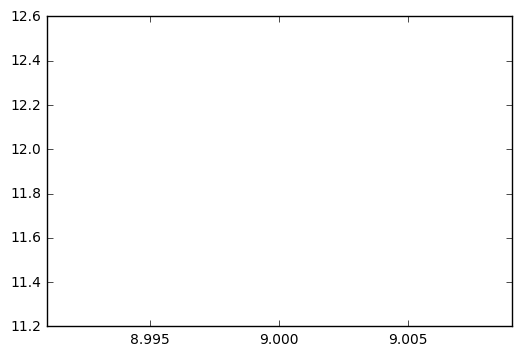

In [76]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))


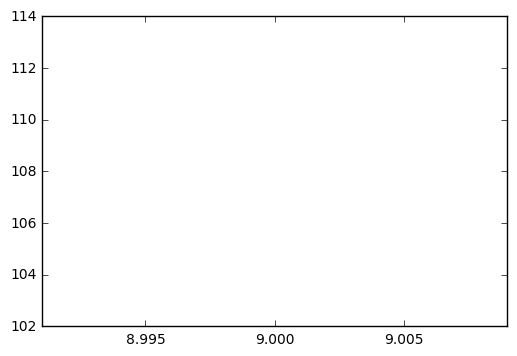

In [77]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  'left=%s, right=%s') % (left, right))


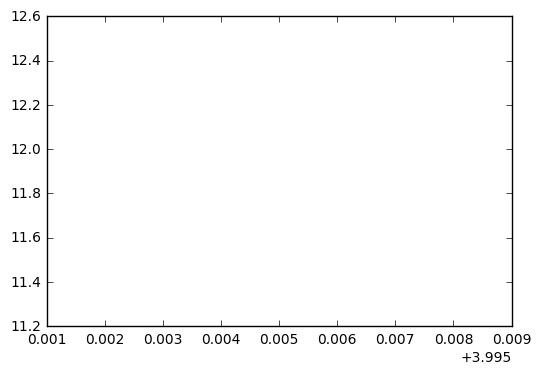

In [78]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [79]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [80]:

df['Request Details'].value_counts()


Building_commercial - Not_Offensive                 17
Pole - Not_Offensive                                10
Building_commercial - Offensive                     10
Signal_box - Not_Offensive                           9
Transit_Shelter_Platform - Not_Offensive             8
City_receptacle - Not_Offensive                      7
Mail_box - Offensive                                 6
Mail_box - Not_Offensive                             6
Parking_meter - Not_Offensive                        5
Building_residential - Not_Offensive                 5
Sidewalk_structure - Not_Offensive                   3
Signal_box - Offensive                               3
Fire_hydrant - Not_Offensive                         3
Other_enter_additional_details_below - Offensive     3
Fire_hydrant - Offensive                             2
Street - Offensive                                   2
Sidewalk_in_front_of_property - Not_Offensive        2
Pole - Offensive                                     2
Building_o

In [81]:
df['Supervisor District'].value_counts().sort_index()



-1      1
 1      3
 2      3
 3     25
 4      1
 5      7
 6     21
 7      1
 8     10
 9     26
 10     7
 11     3
Name: Supervisor District, dtype: int64

In [82]:
df.Neighborhood.value_counts()

Mission                     19
Chinatown                   19
Tenderloin                  11
Potrero Hill                 8
Civic Center                 7
Nob Hill                     5
Mission Dolores              5
Lower Haight                 3
South of Market              3
Bernal Heights               3
Mint Hill                    3
Duboce Triangle              2
Lower Nob Hill               2
Inner Richmond               2
Rincon Hill                  1
Holly Park                   1
Outer Mission                1
Parkmerced                   1
Marina                       1
Crocker Amazon               1
Excelsior                    1
Aquatic Park / Ft. Mason     1
South Beach                  1
Upper Market                 1
Outer Richmond               1
Financial District           1
Cathedral Hill               1
Apparel City                 1
Outer Sunset                 1
Name: Neighborhood, dtype: int64

In [83]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
10,6612843,2016-12-09 16:22:18,NaT,2016-12-09 17:06:24,Open,open,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 16TH ST and CALEDONIA ST,9,Mission,"(37.7649478070053, -122.421381595319)",Open311,NaN
27,6612264,2016-12-09 14:29:40,NaT,2016-12-09 14:29:40,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Mail_box - Offensive,Intersection of 18TH ST and MISSION ST,9,Mission,"(37.7618358043403, -122.419359315196)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b30473da19793c74c6bf6/photo_20161209_142837.jpg
57,6611030,2016-12-09 10:10:13,NaT,2016-12-09 10:58:57,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"577 VALENCIA ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.763689095375, -122.421587605718)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584af3743da19793c74c61b5/report.jpg
60,6611008,2016-12-09 10:04:42,NaT,2016-12-09 10:58:53,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"3016 16TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765138960266, -122.420042041081)",Voice In,NaN
75,6610830,2016-12-09 09:37:06,NaT,2016-12-09 10:01:06,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Pole - Offensive,Intersection of BAY SHORE BLVD ON RAMP and HWY 101 S ON RAMP,9,Mission,"(37.7498544021639, -122.405623813695)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584aebb43da19793c74c5f39/photo_20161209_093611.jpg
80,6610733,2016-12-09 09:22:21,NaT,2016-12-09 10:26:21,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"240 SHOTWELL ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.764751154394, -122.416438535593)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584ae83e3da19793c74c5db4/report.jpg
81,6610699,2016-12-09 09:18:54,NaT,2016-12-09 10:12:50,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"2000 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.765099046216, -122.415615517012)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584ae76d3da19793c74c5ce3/report.jpg
89,6610469,2016-12-09 08:40:46,NaT,2016-12-09 08:40:46,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 19TH ST and LEXINGTON ST,9,Mission,"(37.7601475157402, -122.420659554429)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584ade833da19793c74c5a9d/photo_20161209_084030.jpg
90,6610462,2016-12-09 08:39:32,NaT,2016-12-09 10:07:17,Open,Open,PUC - Water - Graffiti Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_hydrant - Not_Offensive,Intersection of 19TH ST and SAN CARLOS ST,9,Mission,"(37.7601888876742, -122.419974854088)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584ade393da19793c74c5a81/photo_20161209_083917.jpg
91,6610456,2016-12-09 08:38:10,NaT,2016-12-09 08:38:10,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 19TH ST and MISSION ST,9,Mission,"(37.7602354682392, -122.419206209871)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584adde43da19793c74c5a71/photo_20161209_083756.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [84]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [90]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4ce03da19793c74c7253/photo_20161209_163240.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b49a13da19793c74c71a4/photo_20161209_161846.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b49673da19793c74c7186/photo_20161209_161746.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b452a3da19793c74c70bd/report.jpg
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b42c33da19793c74c702d/photo_20161209_154911.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b216f3da19793c74c6910/report.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b1dcc3da19793c74c6891/report.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b1d393da19793c74c6877/report.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

In [91]:
print(peskin[:])

0     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4ce03da19793c74c7253/photo_20161209_163240.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b49a13da19793c74c71a4/photo_20161209_161846.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b49673da19793c74c7186/photo_20161209_161746.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b452a3da19793c74c70bd/report.jpg
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b42c33da19793c74c702d/photo_20161209_154911.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b216f3da19793c74c6910/report.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b1dcc3da19793c74c6891/report.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b1d393da19793c74c6877/report.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

In [92]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b53373da19793c74c7310/report.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b502a3da19793c74c72a4/photo_20161209_164442.jpg
3     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4ce03da19793c74c7253/photo_20161209_163240.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4c1d3da19793c74c723a/report.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b49a13da19793c74c71a4/photo_20161209_161846.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b49673da19793c74c7186/photo_20161209_161746.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b452a3da19793c74c70bd/report.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

In [47]:
len(images)

86

In [27]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7f0a3da19793c74c75c7/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/584b2d803da19793c74c6b32/photo_20161209_141728.jpg


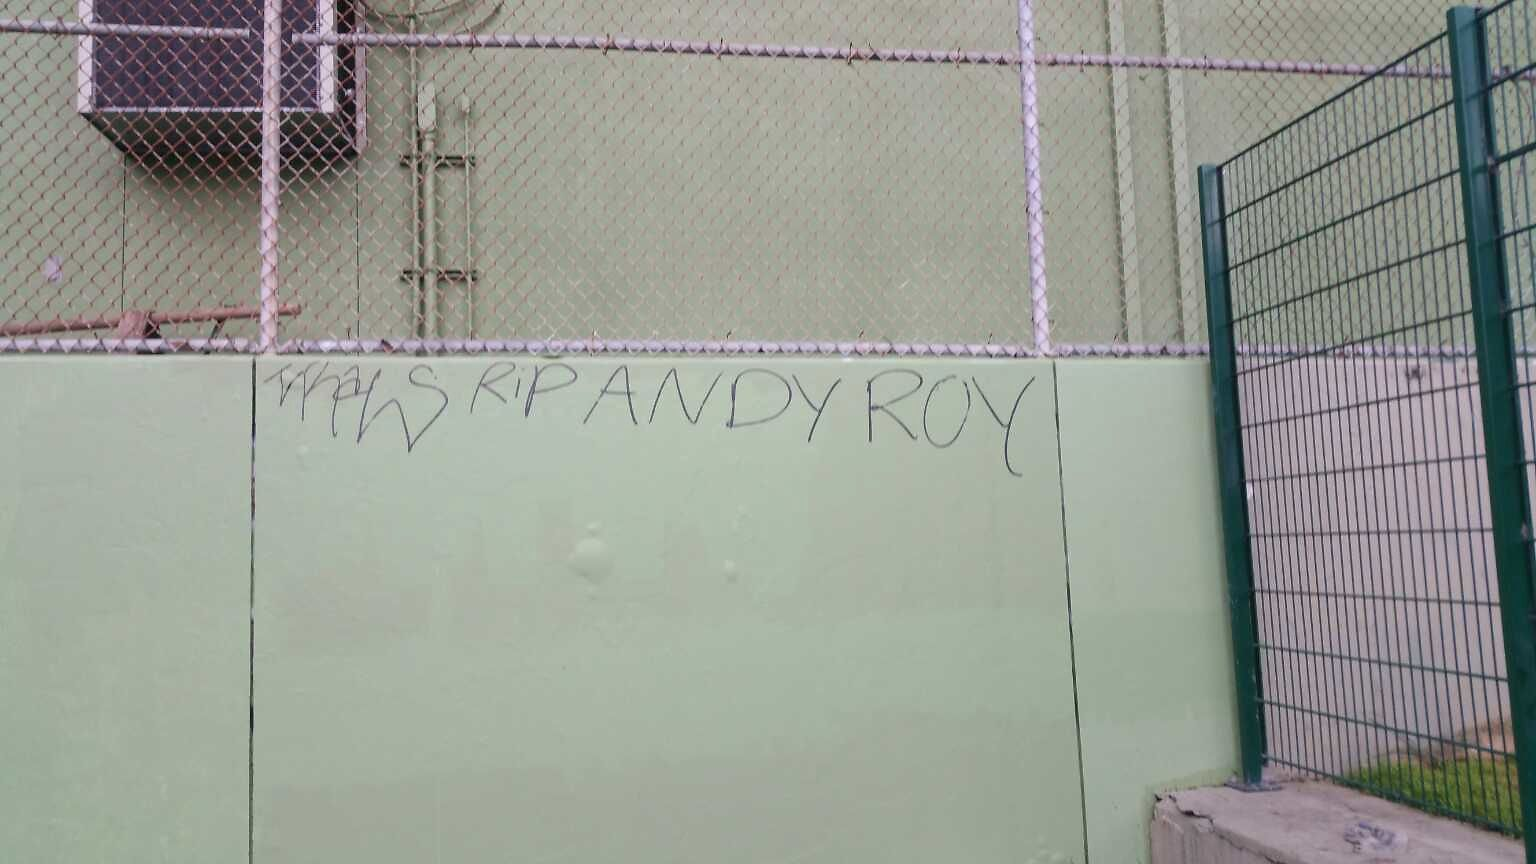

In [28]:
print(images[20])
Image(images[20])


In [29]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [93]:
peskin[:180].to_csv("./imagelist.txt", index=False)

In [94]:
!yes| bash vidCreate.sh

rm: cannot remove '0*.jpg': No such file or directory
--2016-12-10 23:56:48--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4ce03da19793c74c7253/photo_20161209_163240.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80767 (79K) [image/jpeg]
Saving to: 'photo_20161209_163240.jpg'

photo_20161209_1632 100%[===================>]  78.87K  --.-KB/s    in 0.1s    

2016-12-10 23:56:48 (760 KB/s) - 'photo_20161209_163240.jpg' saved [80767/80767]

--2016-12-10 23:56:48--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584b49a13da19793c74c71a4/photo_20161209_161846.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 97353 (95K) [image/jpeg]
Saving to: 'photo_20161209_161846.jpg'

photo_20161209_1618 100%[===================>]  95.07K 

In [28]:
'''
Had problems with this code, running standalone

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..
'''

'\nHad problems with this code, running standalone\n\n%cd assets/\n!wget -i ../imagelist.txt\n\n!sleep 30\n#%ls | gawk \'BEGIN{ a=1 }{ printf "mv "%s" %04d.jpg\n", $0, a++ }\' | bash\n#!sleep 10\n#!convert -delay 50 *.jpg out.mp4\n%cd ..\n'

In [29]:
#!convert -delay 50 *.jpg out.mp4


In [30]:
!ls


San+Francisco+Concerns-Homeless Aggressive behavior and well being.ipynb
San+Francisco+Homeless Encampments.ipynb
San+Francisco+Homeless+Data+Analysis (1).ipynb
San+Francisco+Homeless+Data+Analysis.ipynb
San+Francisco+Poop.ipynb
assets
gifCreate.sh
gistfile1.txt
imagelist.txt
input
sfOneDay.ipynb
vidCreate.sh
video.gif
video.webm


In [31]:
Image('report2.jpg')